In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Set the font family and size to use for Matplotlib figures.
# plt.rcParams['font.family'] = 'calibri'
plt.rcParams['font.size'] = 17

# System
Note: All analysis is for low inlet velocity

Mouthpiece	inner diameter	8.02
- length 	13.96
- thickness	0.13

Tube Between	inner diameter 	4.54
- length 	27.955
- thickness	0.15

Wick	length 	7.5
- thickness	0.155
- inner diameter	4.54

Coils  	qty 	10
- diameter outer 	4.53
- coil diameter 	0.3
- empty space between	0.5

Inlet Tube	inner diameter 	4.54
- length 	2.17
- thickness	0.15

Mesh
Domain      	Nodes	Elements <br>
Inner-Volume 	2278204	13225239

Boundary Conditions
	• Inlet velocity: 0. 630 [m s^-1]
	• Outlet Pressure: 101.33 [kPa]
	• Residual Target: 1e-05
	• Steady State 
	• Open Air is a cylinder with all walls except for the opening at the end. 
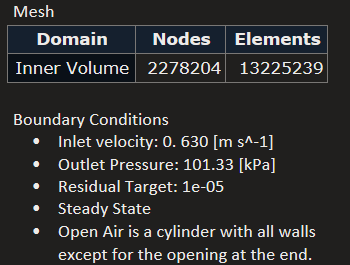

## Computational Model

In [3]:
# Nominal Model for low inlet 
nominal = pd.read_csv("data/simulation/nominal/S0_G0_V0_063.csv") 
center = nominal[' Y [ m ]'][0] + 0.008

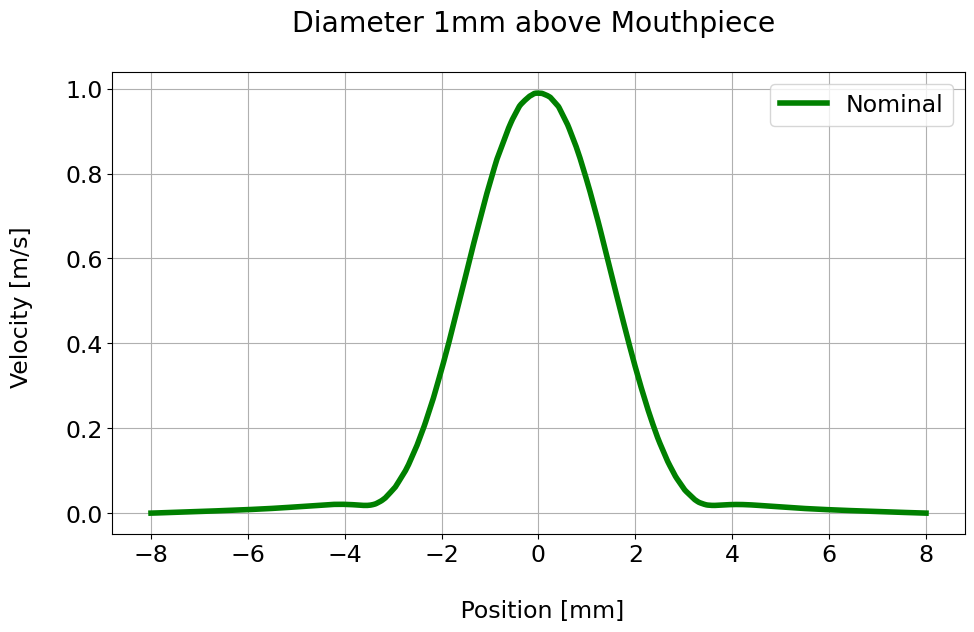

In [4]:
plt.figure(figsize=(11,6))
# plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('Diameter 1mm above Mouthpiece \n')
# plt.axis([-4,4,0,1.0])
plt.plot((nominal[' Y [ m ]']-center)*1e3, nominal[' Velocity [ m s^-1 ]'],'-',color='green', label='Nominal',linewidth=4)
plt.legend()
plt.grid()
plt.savefig('images/simulation_nominal.png', dpi=300)

In [5]:
# Samples Model for low inlet 
sim1 = pd.read_csv("data/simulation/samples/S1_G1_V0_063.csv") 
sim2 = pd.read_csv("data/simulation/samples/S2_G2_V0_063329.csv") 
sim3 = pd.read_csv("data/simulation/samples/S3_G3_V0_0642.csv") 
center1 = sim1[' Y [ m ]'][0] + 0.008
center2 = sim2[' Y [ m ]'][0] + 0.008
center3 = sim3[' Y [ m ]'][0] + 0.008

In [6]:
avgsim,sdsim = [],[]
n=3
i = 0
while i < len(sim1[' Y [ m ]']):
    e = np.array([sim1[' Velocity [ m s^-1 ]'][i],sim2[' Velocity [ m s^-1 ]'][i],sim3[' Velocity [ m s^-1 ]'][i]])
    avgsim.append(np.average(e))
    sdsim.append(np.std(e))
    i+=1
plussim = avgsim + 2*max(sdsim)/np.sqrt(n)
minussim = avgsim - 2*max(sdsim)/np.sqrt(n)

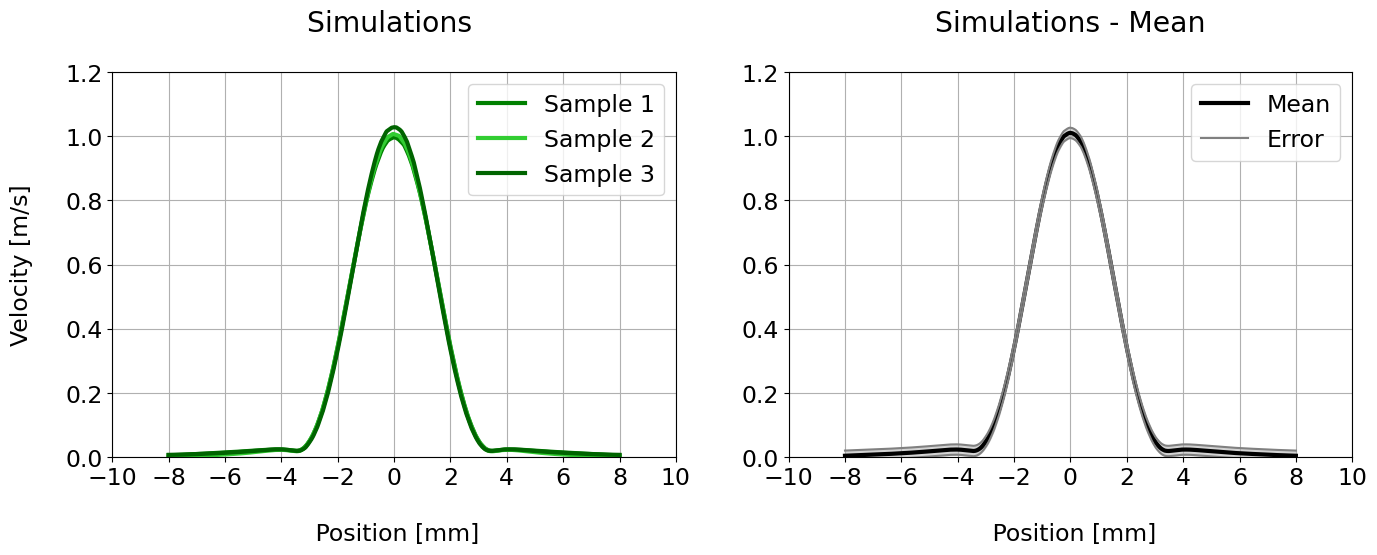

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s]\n')
plt.title('Simulations \n')
plt.axis([-10,10,0,1.2])
# the subtraction is by the location with max value to center the plot
plt.plot((sim1[' Y [ m ]']-center1)*1e3, sim1[' Velocity [ m s^-1 ]'],'-',color='green', label='Sample 1',linewidth=3)
plt.plot((sim2[' Y [ m ]']-center2)*1e3, sim2[' Velocity [ m s^-1 ]'],'-',color='limegreen', label='Sample 2',linewidth=3)
plt.plot((sim3[' Y [ m ]']-center3)*1e3, sim3[' Velocity [ m s^-1 ]'],'-',color='darkgreen', label='Sample 3',linewidth=3)
plt.legend(loc='upper right')
plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('\n Position [mm]')
# plt.ylabel('Error')
plt.title('Simulations - Mean\n')
plt.axis([-10,10,0,1.2])
plt.plot((sim1[' Y [ m ]']-center1)*1e3, avgsim, '-k', linewidth=3, label='Mean')
plt.plot((sim2[' Y [ m ]']-center2)*1e3, plussim,linestyle='-',label="Error",color="gray")
plt.plot((sim3[' Y [ m ]']-center3)*1e3, minussim,linestyle='-',color="gray")
plt.fill_between((sim1[' Y [ m ]']-center1)*1e3,plussim, minussim, color="lightgray")
plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
plt.legend(loc='upper right')
plt.grid()
plt.savefig('images/simulation_samples.png', dpi=300)

## Experiments

In [8]:
expS1 = pd.read_csv("data/experiments/S1_Low_Exp_Outlet.csv") 
expS2 = pd.read_csv("data/experiments/S2_Low_Exp_Outlet.csv") 
expS3 = pd.read_csv("data/experiments/S3_Low_Exp_Outlet.csv") 
n = 3  # Number of Samples

In [9]:
avgexp,sdexp = [],[]
expS3nonoise = np.array(expS3['V (m/s)'][2:])
i = 0
while i < len(expS1['x (mm)']):
    e = np.array([expS1['V (m/s)'][i],expS2['V (m/s)'][i],expS3nonoise[i]])
    avgexp.append(np.average(e))
    sdexp.append(np.std(e))
    i+=1
plus = avgexp + 1*max(sdexp)/np.sqrt(n)
minus = avgexp - 1*max(sdexp)/np.sqrt(n)

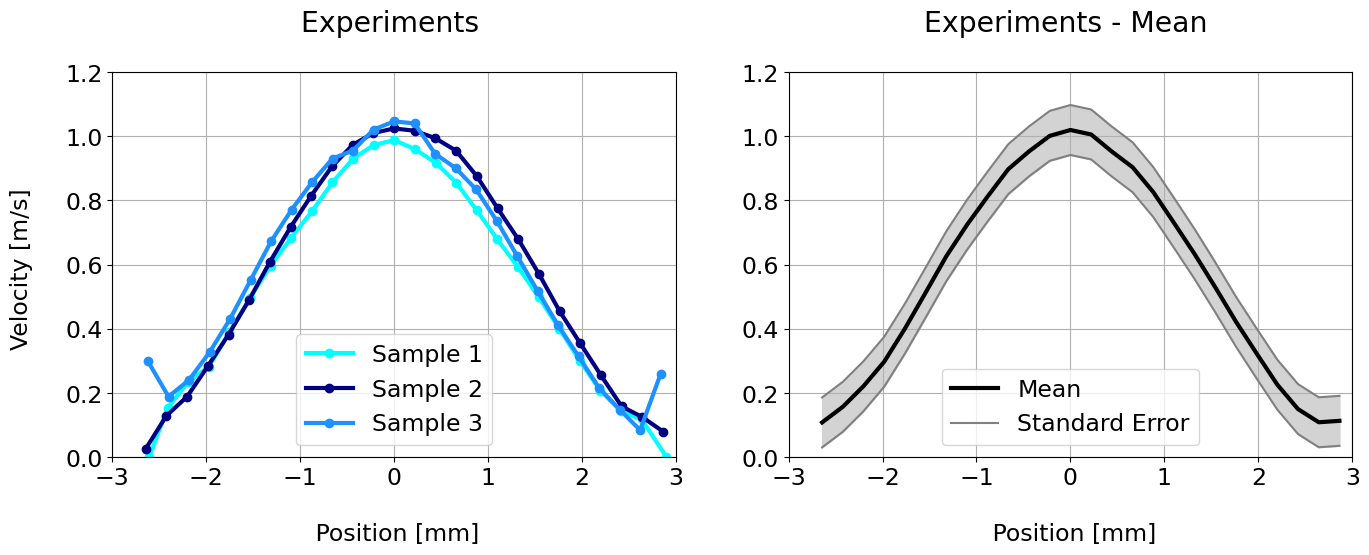

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('Experiments \n')
# the subtraction is by the location with max value to center the plot
plt.plot(expS1['x (mm)']-5.36,expS1['V (m/s)'],'-o',color='cyan', label='Sample 1',linewidth=3)
plt.plot(expS2['x (mm)']-5.39655,expS2['V (m/s)'],'-o',color='navy', label='Sample 2',linewidth=3)
plt.plot(expS3['x (mm)'][2:]-5.60712,expS3['V (m/s)'][2:],'-o',color='dodgerblue', label='Sample 3',linewidth=3)
plt.axis([-3,3,0,1.2])
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('\n Position [mm]')
# plt.ylabel('Error')
plt.title('Experiments - Mean \n')
plt.plot(expS2['x (mm)']-5.39655,avgexp, '-k', linewidth=3, label='Mean')
plt.plot(expS2['x (mm)']-5.39655, plus,linestyle='-',label="Standard Error",color="gray")
plt.plot(expS2['x (mm)']-5.39655, minus,linestyle='-',color="gray")
plt.fill_between(expS2['x (mm)']-5.39655,plus, minus, color="lightgray")
plt.axis([-3,3,0,1.2])
plt.legend()
plt.grid()
plt.savefig('images/experiments_samples.png', dpi=300)

## Verification

### Mesh Refinement

This analysis includes the full geometry with the inlet, atomizer, tube, mouthpiece, and open air. 

In [11]:
df_meshrefinement_all = pd.read_csv("data/verification/meshrefinement/dataset_refinement.csv") 
df_meshrefinement_trans = df_meshrefinement_all.transpose()
totalnodes = df_meshrefinement_trans[9][0:]
totalelements = df_meshrefinement_trans[10][0:]
df_meshrefinement = df_meshrefinement_all[0:9]
df_meshrefinement_all

,Unnamed: 0,M2/COARSE (element size: 0.0004),M3(element size: 0.0003),M3-1(element size: 0.00028),M3-2(element size: 0.00026),M3-3(element size: 0.00024),M3-4(element size: 0.00022),M4(element size: 0.0002),M4-1(element size: 0.00018),M4-2 (element size: 0.00016),M4-3/Fine(element size: 0.00014)
0,Outlet,4.484671e-01,4.800676e-01,4.873589e-01,4.858746e-01,4.865588e-01,4.859233e-01,4.849308e-01,4.813828e-01,4.783957e-01,4.755047e-01
1,1mm,9.016487e-01,9.635749e-01,9.714138e-01,9.743835e-01,9.788875e-01,9.808701e-01,9.830303e-01,9.811468e-01,9.814316e-01,9.820649e-01
2,MP,9.233295e-01,9.813662e-01,9.893265e-01,9.928494e-01,9.985443e-01,1.000302e+00,9.999403e-01,9.995162e-01,9.995657e-01,9.999798e-01
3,Tube,1.162059e+00,1.206886e+00,1.213577e+00,1.220233e+00,1.230039e+00,1.235835e+00,1.238662e+00,1.238619e+00,1.242038e+00,1.243183e+00
4,Coil 10,1.152307e+00,1.170609e+00,1.191050e+00,1.186760e+00,1.216129e+00,1.214511e+00,1.211016e+00,1.209528e+00,1.218649e+00,1.218339e+00
5,Coil 5,1.038885e+00,1.037315e+00,1.060804e+00,1.060804e+00,1.086819e+00,1.085181e+00,1.082789e+00,1.082686e+00,1.091989e+00,1.091465e+00
6,Btw Coil 3&4,9.787686e-01,9.863194e-01,1.000189e+00,9.999270e-01,9.863194e-01,9.863194e-01,1.026365e+00,1.026517e+00,1.035630e+00,1.035253e+00
7,Coil 1,7.945878e-01,8.125972e-01,8.185800e-01,8.196206e-01,8.379161e-01,8.385749e-01,8.397941e-01,8.410130e-01,8.468197e-01,8.474839e-01
8,Inlet Tube,6.719043e-01,6.772097e-01,6.790539e-01,6.796046e-01,6.841289e-01,6.846313e-01,6.853775e-01,6.860075e-01,6.876990e-01,6.879202e-01
9,Total Nodes,3.621110e+05,7.543010e+05,9.097190e+05,1.115206e+06,1.395877e+06,1.787027e+06,2.354237e+06,3.193041e+06,4.500121e+06,6.663568e+06


In [12]:
totalelements

Unnamed: 0                          Total Elements
M2/COARSE (element size: 0.0004)         1723087.0
M3(element size: 0.0003)                 3993266.0
M3-1(element size: 0.00028)              4897382.0
M3-2(element size: 0.00026)              6096385.0
M3-3(element size: 0.00024)              7735148.0
M3-4(element size: 0.00022)             10022241.0
M4(element size: 0.0002)                13328905.0
M4-1(element size: 0.00018)             18250030.0
M4-2 (element size: 0.00016)            25940033.0
M4-3/Fine(element size: 0.00014)        38678387.0
Name: 10, dtype: object

In [19]:
totalelements = np.array(df_meshrefinement_trans[10][1:])
elemsize = [0.0004,0.0003,0.00028,0.00026,0.00024,0.00022,0.0002,0.00018,0.00016,0.00014]
column_values = ['M2','M3','M3-1','M3-2','M3-3','M3-4','M4','M4-1','M4-2','M4-3']
index_values = ['Element Size','Total Elements']
# creating the dataframe
meshref_df = pd.DataFrame(data = [elemsize,totalelements], 
                  index = index_values, 
                  columns = column_values)
meshref_df.transpose()

,Element Size,Total Elements
M2,0.00040,1723087.0
M3,0.00030,3993266.0
M3-1,0.00028,4897382.0
M3-2,0.00026,6096385.0
M3-3,0.00024,7735148.0
M3-4,0.00022,10022241.0
M4,0.00020,13328905.0
M4-1,0.00018,18250030.0
M4-2,0.00016,25940033.0
M4-3,0.00014,38678387.0


In [22]:
len(totalelements)

10

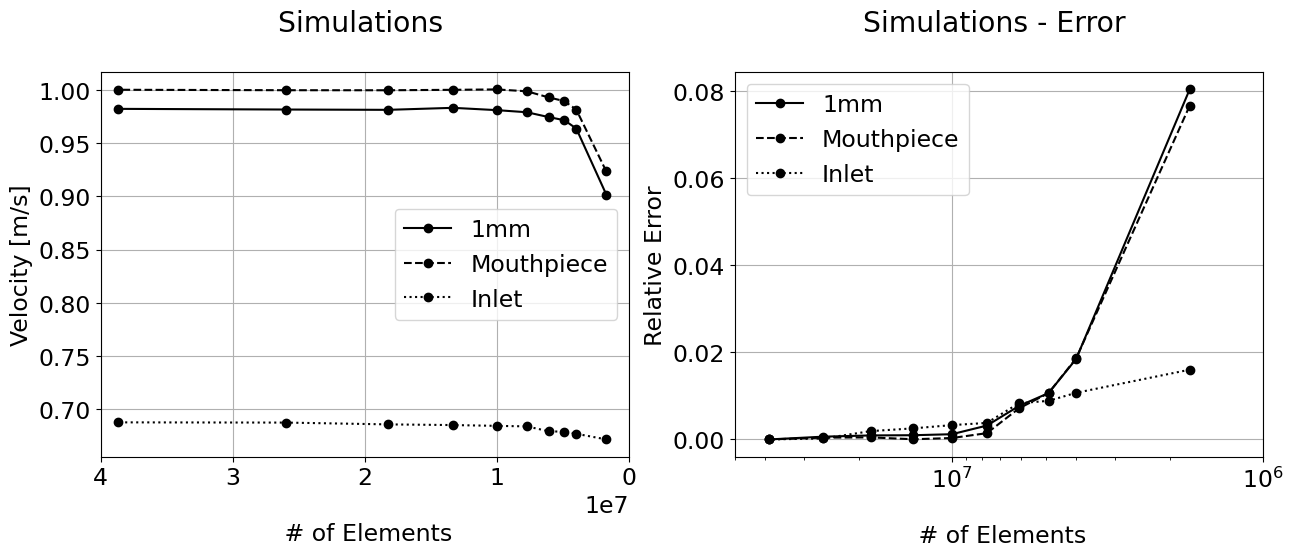

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n # of Elements')
plt.ylabel('Velocity [m/s]')
plt.title('Simulations \n')
# plt.axis([-3,3,0,1.0])
plt.plot(totalelements,df_meshrefinement_trans[1][1:],'-ok', label='1mm')
plt.plot(totalelements,df_meshrefinement_trans[2][1:],'ok--', label='Mouthpiece')
plt.plot(totalelements,df_meshrefinement_trans[8][1:],'ok:', label='Inlet')
plt.xlim(4e7, 0)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('\n # of Elements')
plt.ylabel('Relative Error')
plt.title('Simulations - Error \n')
# plt.axis([-3,3,0,1.0])
plt.semilogx(totalelements,np.abs(df_meshrefinement_trans[1][1:]-df_meshrefinement_trans[1][1:][-1]) ,'-ok', label='1mm')
plt.semilogx(totalelements,np.abs(df_meshrefinement_trans[2][1:]-df_meshrefinement_trans[2][1:][-1]) ,'ok--', label='Mouthpiece')
plt.semilogx(totalelements,np.abs(df_meshrefinement_trans[8][1:]-df_meshrefinement_trans[8][1:][-1]) ,'ok:', label='Inlet')
plt.xlim(5e7, 1e6)
# plt.ylim(0,0.02)
plt.legend()
plt.grid()
plt.savefig('images/simulation_meshes.png', dpi=300)

In [25]:
df_meshrefinement_1mm = pd.read_csv("data/verification/meshrefinement/dataset_refinement1mm.csv") 
df_meshrefinement_1mm_trans = df_meshrefinement_1mm.transpose()
y1mm = np.array(df_meshrefinement_1mm_trans[10][0:])
maxmeshrefinement1mm = np.array([np.max(df_meshrefinement_1mm_trans[0][1:]),np.max(df_meshrefinement_1mm_trans[1][1:]),np.max(df_meshrefinement_1mm_trans[2][1:]),np.max(df_meshrefinement_1mm_trans[3][1:]),np.max(df_meshrefinement_1mm_trans[4][1:]),np.max(df_meshrefinement_1mm_trans[5][1:]),np.max(df_meshrefinement_1mm_trans[6][1:]),np.max(df_meshrefinement_1mm_trans[7][1:]),np.max(df_meshrefinement_1mm_trans[8][1:]),np.max(df_meshrefinement_1mm_trans[9][1:])])
maxmeshrefinement1mmERR= np.array([np.abs(np.max(df_meshrefinement_1mm_trans[0][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[1][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[2][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[3][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[4][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[5][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[6][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[7][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[8][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[9][1:])-np.max(df_meshrefinement_1mm_trans[9][1:]))])

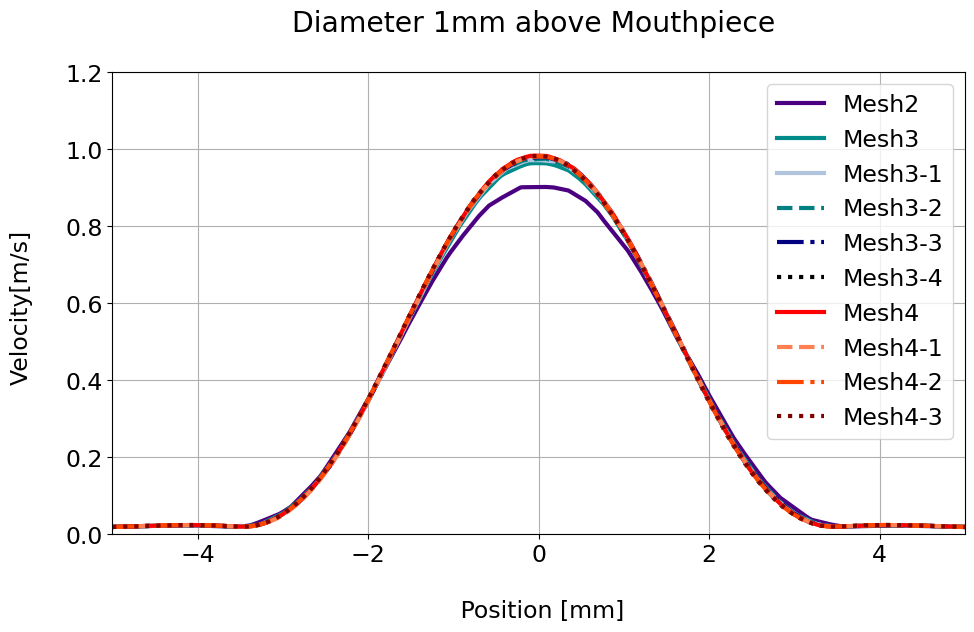

In [30]:
plt.figure(figsize=(11,6))
# plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity[m/s] \n')
plt.title('Diameter 1mm above Mouthpiece \n')
plt.axis([-5,5,0,1.2])
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[0][1:],'-',color='indigo', label='Mesh2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[1][1:],'-',color='darkcyan', label='Mesh3',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[2][1:],'-',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[3][1:],'--',color='teal', label='Mesh3-2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[4][1:],'-.',color='navy', label='Mesh3-3',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[5][1:],':',color='black', label='Mesh3-4',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[6][1:],'-', color='red', label='Mesh4',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[7][1:],'--', color='coral', label='Mesh4-1',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[8][1:],'-.', color='orangered', label='Mesh4-2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[9][1:],':', color='maroon', label='Mesh4-3',linewidth=3)
plt.legend()
plt.grid()
plt.savefig('images/simulation_meshes_diameter.png', dpi=300)

In [32]:
maxmeshrefinement1mmERR[8]

0.00042676919999995455

IndexError: index 10 is out of bounds for axis 0 with size 10

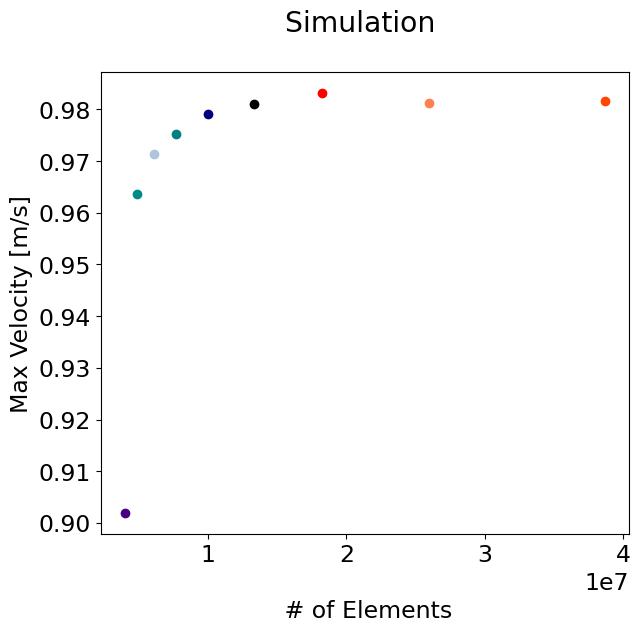

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.xlabel('\n # of Elements')
plt.ylabel('Max Velocity [m/s]')
plt.title('Simulation \n')
# plt.plot(totalelements[1:],maxmeshrefinement1mm,'-k',linewidth=2)
plt.plot(totalelements[1],maxmeshrefinement1mm[0],'o',color='indigo', label='Mesh2',linewidth=3)
plt.plot(totalelements[2],maxmeshrefinement1mm[1],'o',color='darkcyan', label='Mesh3',linewidth=3)
plt.plot(totalelements[3],maxmeshrefinement1mm[2],'o',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.plot(totalelements[4],maxmeshrefinement1mm[3],'o',color='teal', label='Mesh3-2',linewidth=3)
plt.plot(totalelements[5],maxmeshrefinement1mm[4],'o',color='navy', label='Mesh3-3',linewidth=3)
plt.plot(totalelements[6],maxmeshrefinement1mm[5],'o',color='black', label='Mesh3-4',linewidth=3)
plt.plot(totalelements[7],maxmeshrefinement1mm[6],'o', color='red', label='Mesh4',linewidth=3)
plt.plot(totalelements[8],maxmeshrefinement1mm[7],'o', color='coral', label='Mesh4-1',linewidth=3)
plt.plot(totalelements[9],maxmeshrefinement1mm[8],'o', color='orangered', label='Mesh4-2',linewidth=3)
plt.plot(totalelements[10],maxmeshrefinement1mm[9],'o', color='maroon', label='Mesh4-3',linewidth=3)
plt.xlim(4e7, 0)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('\n # of Elements')
plt.ylabel('Relative Error')
plt.title('Simulation - Relative Error \n')
# plt.semilogx(totalelements[1:],maxmeshrefinement1mmERR,'-ok',linewidth=2)
plt.semilogx(totalelements[1],maxmeshrefinement1mmERR[0],'o',color='indigo', label='Mesh2',linewidth=3)
plt.semilogx(totalelements[2],maxmeshrefinement1mmERR[1],'o',color='darkcyan', label='Mesh3',linewidth=3)
plt.semilogx(totalelements[3],maxmeshrefinement1mmERR[2],'o',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.semilogx(totalelements[4],maxmeshrefinement1mmERR[3],'o',color='teal', label='Mesh3-2',linewidth=3)
plt.semilogx(totalelements[5],maxmeshrefinement1mmERR[4],'o',color='navy', label='Mesh3-3',linewidth=3)
plt.semilogx(totalelements[6],maxmeshrefinement1mmERR[5],'o',color='black', label='Mesh3-4',linewidth=3)
plt.semilogx(totalelements[7],maxmeshrefinement1mmERR[6],'o', color='red', label='Mesh4',linewidth=3)
plt.semilogx(totalelements[8],maxmeshrefinement1mmERR[7],'o', color='coral', label='Mesh4-1',linewidth=3)
plt.semilogx(totalelements[9],maxmeshrefinement1mmERR[8],'o', color='orangered', label='Mesh4-2',linewidth=3)
plt.semilogx(totalelements[10],maxmeshrefinement1mmERR[9],'o', color='maroon', label='Mesh4-3',linewidth=3)
plt.xlim(5e7, 1e5)
plt.ylim(-0.01, 0.085)
plt.legend()
plt.grid()
plt.savefig('images/simulation_meshes_refinement.png', dpi=300)

In [18]:
discretizationErr = maxmeshrefinement1mmERR[6]

### Tolerance Analysis
Comparing tolerance of 1e-4 and 1e-6 for Mesh Refinement: R2 for Low inlet velocity (L/min), Geometry is pipe, atomizer, and inlet. 

In [30]:
totalelements = [44937,304013,2131386,16499143]
elementsair = [36537,260270,2035890,16137339]
column_values = ['R0(Coarse)','R1','R2','R3(Fine)']
index_values = ['Total Airflow Elements','Total Elements']
# creating the dataframe
mesh_df = pd.DataFrame(data = [totalelements,elementsair], 
                  index = index_values, 
                  columns = column_values)
mesh_df

,R0(Coarse),R1,R2,R3(Fine)
Total Airflow Elements,44937,304013,2131386,16499143
Total Elements,36537,260270,2035890,16137339


In [31]:
#Line Data   
#[' Y [ m ]'], [' Tol_4_Velocity [ m s^-1 ]'],[' Tol_6_Velocity [ m s^-1 ]'] 
df_Line1 = pd.read_csv("data/verification/tolerance/Line1R2_Lo.csv") 
df_Line2 = pd.read_csv("data/verification/tolerance/Line2R2_Lo.csv")
df_Line3 = pd.read_csv("data/verification/tolerance/Line3R2_Lo.csv")
df_LineAC = pd.read_csv("data/verification/tolerance/LineAtCoilR2_Lo.csv")
df_LineB = pd.read_csv("data/verification/tolerance/LineBottomR2_Lo.csv")
df_LineBC = pd.read_csv("data/verification/tolerance/LineBtwCoilsR2_Lo.csv")
# Point Data
#['R2_Low'], ['R2_Medium'], ['R2_High'], ['Unnamed: 3']
df_Pt4 = pd.read_csv('data/verification/tolerance/Points_tol_4.csv')
df_Pt6 = pd.read_csv('data/verification/tolerance/Points_tol_6.csv')

In [32]:
avg_Line1_T4 = np.average(df_Line1[' Tol_4_Velocity [ m s^-1 ]'])
avg_Line2_T4 = np.average(df_Line2['Tol_4_ Velocity [ m s^-1 ]'])
avg_Line3_T4 = np.average(df_Line3['Tol_4_Velocity [ m s^-1 ]'])
avg_LineAC_T4 = np.average(df_LineAC[' Velocity [ m s^-1 ]'])
avg_LineBC_T4 = np.average(df_LineBC[' Velocity [ m s^-1 ]'])
avg_LineB_T4 = np.average(df_LineB[' Velocity [ m s^-1 ]'])

avg_Line1_T6 = np.average(df_Line1[' Tol_6_Velocity [ m s^-1 ]'])
avg_Line2_T6 = np.average(df_Line1[' Tol_6_Velocity [ m s^-1 ]'])
avg_Line3_T6 = np.average(df_Line1[' Tol_6_Velocity [ m s^-1 ]'])
avg_LineAC_T6 = np.average(df_LineAC[' Velocity [ m s^-1 ].1'])
avg_LineBC_T6 = np.average(df_LineBC[' Velocity [ m s^-1 ]'])
avg_LineB_T6 = np.average(df_LineB[' Velocity [ m s^-1 ]'])

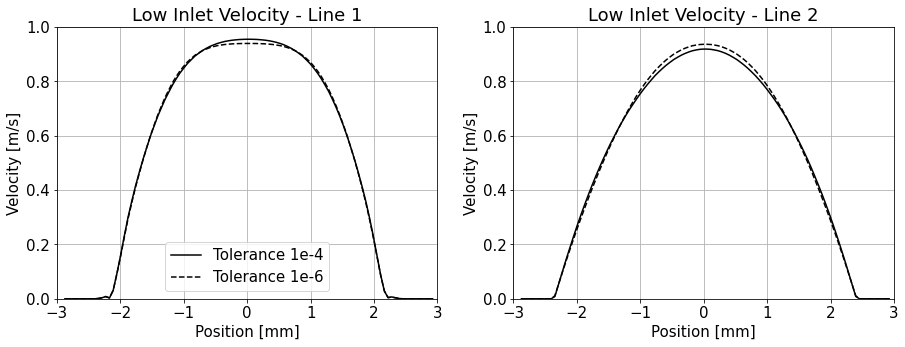

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line 1')
plt.axis([-3,3,0,1.0])
plt.plot((df_Line1[' Y [ m ]']-0.0125)*10**3,df_Line1[' Tol_4_Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_Line1[' Y [ m ]']-0.0125)*10**3,df_Line1[' Tol_6_Velocity [ m s^-1 ]'],'k--', label='Tolerance 1e-6')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line 2')
plt.axis([-3,3,0,1.0])
plt.plot((df_Line2[' Y [ m ]']-0.0125)*10**3, df_Line2['Tol_4_ Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_Line2[' Y [ m ]']-0.0125)*10**3,df_Line2[' Tol_6_Velocity [ m s^-1 ]'],'k--', label='Tolerance 1e-6')
plt.grid()

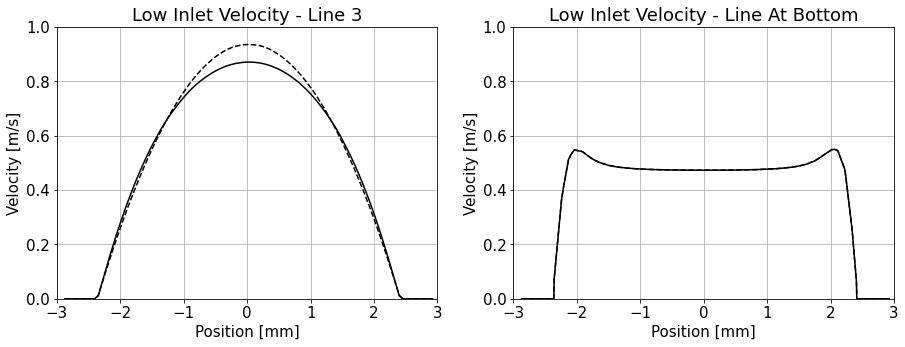

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line 3')
plt.axis([-3,3,0,1.0])
plt.plot((df_Line3[' Y [ m ]']-0.0125)*10**3, df_Line3['Tol_4_Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_Line3[' Y [ m ]']-0.0125)*10**3,df_Line3[' Tol_6_Velocity [ m s^-1 ]'],'k--', label='Tolerance 1e-6')
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line At Bottom')
plt.axis([-3,3,0,1.0])
plt.plot((df_LineB[' Y [ m ]']-0.0125)*10**3,df_LineB[' Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_LineB[' Y [ m ]']-0.0125)*10**3,df_LineB[' Velocity [ m s^-1 ]'],'k--', label='Tolerance 1e-6')
plt.grid()

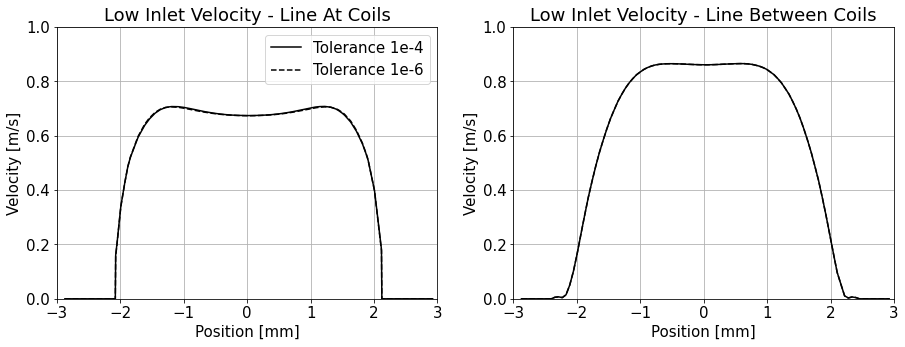

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line At Coils')
plt.axis([-3,3,0,1.0])
plt.plot((df_LineAC[' Y [ m ]']-0.0125)*10**3,df_LineAC[' Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_LineAC[' Y [ m ]']-0.0125)*10**3,df_LineAC[' Velocity [ m s^-1 ].1'],'k--', label='Tolerance 1e-6')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity - Line Between Coils')
plt.axis([-3,3,0,1.0])
plt.plot((df_LineBC[' Y [ m ]']-0.0125)*10**3,df_LineBC[' Velocity [ m s^-1 ]'],'k', label='Tolerance 1e-4')
plt.plot((df_LineBC[' Y [ m ]']-0.0125)*10**3,df_LineBC[' Velocity [ m s^-1 ]'],'k--', label='Tolerance 1e-6')
plt.grid()

In [36]:
avgT4 = np.array([avg_Line1_T4,avg_Line2_T4,avg_Line3_T4,avg_LineAC_T4,avg_LineBC_T4,avg_LineB_T4])
avgT6 = np.array([avg_Line1_T6,avg_Line2_T6,avg_Line3_T6,avg_LineAC_T6,avg_LineBC_T6,avg_LineB_T6])
diff = np.array(np.abs(avgT4-avgT6))
column_values = ['Line1','Line2','Line3','LineAC','LineBC','LineB']
index_values = ['Tol:1e-4','Tol:1e-6','Tol:diff']
# creating the dataframe
tol_dflineavg = pd.DataFrame(data = [avgT4,avgT6,diff], 
                  index = index_values, 
                  columns = column_values)
tol_dflineavg

,Line1,Line2,Line3,LineAC,LineBC,LineB
Tol:1e-4,0.525922,0.503706,0.494029,0.463791,0.508866,0.389764
Tol:1e-6,0.524293,0.524293,0.524293,0.463519,0.508866,0.389764
Tol:diff,0.001629,0.020587,0.030265,0.000272,0.000000,0.000000


In [37]:
ptT4 = np.array(df_Pt4['R2_Low'][0:6])
ptT6 = np.array(df_Pt6['R2_Low'][0:6])
diffP = np.array(np.abs(ptT4-ptT6))
percent = np.array(100*np.abs(ptT4-ptT6)/ptT6)
names = np.array(df_Pt6['Unnamed: 3'][0:6])
column_valuesP = names #['Bottom Line', 'Point Line at Coil', 'Point between Coils','point 1', 'point 2', 'point 3']
index_valuesP = ['Tolerance:1e-4','Tolerance:1e-6','Difference','Percent Difference']
# creating the dataframe
tol_df_pts = pd.DataFrame(data = [ptT4,ptT6,diffP,percent], 
                  index = index_valuesP, 
                  columns = column_valuesP)
tol_df_pts

,Bottom Line,Point Line at Coil,Point between Coils,point 1,point 2,point 3
Tolerance:1e-4,0.473189,0.674063,0.861032,0.954959,0.919188,0.871164
Tolerance:1e-6,0.473084,0.673569,0.855990,0.939486,0.936669,0.935753
Difference,0.000105,0.000494,0.005042,0.015473,0.017481,0.064589
Percent Difference,0.022262,0.073314,0.589035,1.646933,1.866323,6.902343


In [38]:
toleranceERR = diffP[0]  #tolerance difference & 

In [39]:
u_ver = toleranceERR + discretizationErr 
u_ver

0.001177488399999982

## Validation

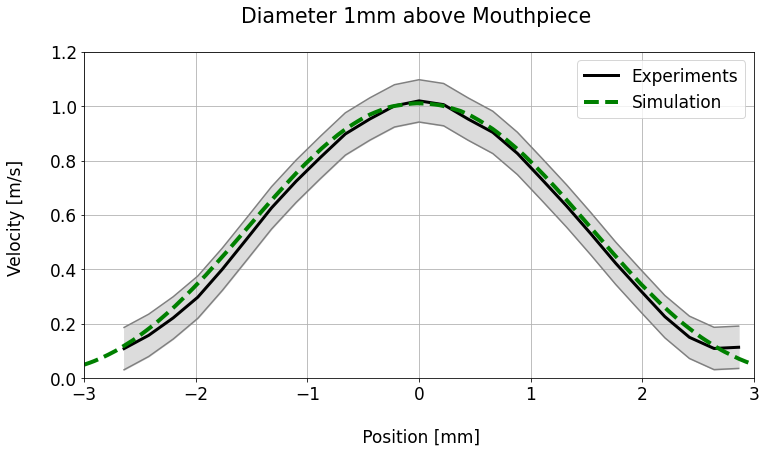

In [215]:
plt.figure(figsize=(12,6))
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('Diameter 1mm above Mouthpiece \n')
plt.plot(expS2['x (mm)']-5.39655,avgexp, '-k', linewidth=3, label='Experiments')
plt.plot(expS2['x (mm)']-5.39655, plus,linestyle='-',color="gray")
plt.plot(expS2['x (mm)']-5.39655, minus,linestyle='-',color="gray")
plt.fill_between(expS2['x (mm)']-5.39655,plus, minus, color="gainsboro")
# plt.plot((nominal[' Y [ m ]']-center)*1e3, nominal[' Velocity [ m s^-1 ]'],'--',color='green', label='Simulation',linewidth=4)
plt.plot((sim1[' Y [ m ]']-center1)*1e3, avgsim,'--',color='green', label='Simulation',linewidth=4)
plt.axis([-3.0,3.0,0,1.2])
plt.legend()
plt.grid()
plt.savefig('images/validation.png', dpi=300)

In [41]:
# Average Velocity at 1mm above the mouthpiece along the diameter. 
sim_avg1mm = np.average(avgsim)
exp_avg1mm = np.average(avgexp)
sim_max1mm = np.max(avgsim)
exp_max1mm = np.max(avgexp)
diffmax = sim_max1mm - exp_max1mm
diffavg = sim_avg1mm - exp_avg1mm

In [42]:
u_val = np.abs(diffmax)

## UQ

In [43]:
################ Functions to calculate the UQ's ###################
# u_input
def inputUQ(vel_1, vel_2, du):
    dO = np.abs(vel_1 -vel_2)  # Diff in Outputs 
#     du = numpy.abs()         # Diff in uncertainties
    u_input  = dO/du              # Sensitivity based on uncertainty
    #print(dO)
    return u_input

# u_num  - Functions for calculation
def fixPtItr(r_21,r_32,e_21,e_32,s,p):
    p_new = (1/np.log(r_21))*np.abs(np.log(np.abs(e_32/e_21)
                                               )+np.log(((r_21**p) - s)/
                                                    (((r_32**p) - s))))
    return p_new

# u_d

#Convert to m/s
def convVS(num_LM): 
    num_VS = num_LM *(1/60000)/(np.pi*(4.54/2000)**2)
    return num_VS

#### Calcualte the CGI for u_num

In [44]:
maxiter=101
rtol=1e-20
N = 100
fs = 1.25

# Mesh or grid size h 
h1 = 0.000122  # Fine Mesh (M 4-3)
h2 = 0.000190  # Medium Mesh (M 3-4)
h3 = 0.000253  # Coarse Mesh (M 3-0)

# Phi = Velocity @ 1mm above mouthpiece Max
phi_1 = 0.982088387    # velocity in m/s
phi_2 = 0.9809986949   # velocity in m/s
phi_3 = 0.9636819363   # velocity in m/s

# Mesh: h_coarse/h_fine 
r_21 =  h2/h1 # h_2/h_1   
r_32 =  h3/h2 # h_3/h_2
e_21 = phi_2-phi_1 
e_32 = phi_3-phi_2 

# s is the sign of e32/e21
if (e_32/e_21)< 0:
    s = -1
elif (e_32/e_21)> 0:
    s = 1    
    
conv = []          # convergence history
diff = rtol + 1    # initial difference
ite = 0            # iteration index
p = np.zeros(N) # Holds all p values 

# Initial p value assuming q(p) = 0 
p[0] = (1/np.log(r_21))*np.abs(np.log(np.abs(e_32/e_21)))

n = 0;  # Since at p[0] is initial value 
while diff > rtol and ite <maxiter: 
    # Calculating the next p value 
    p[n+1] = fixPtItr(r_21,r_32,e_21,e_32,s,p[n])

    # Compute the relative L2-Norm of the difference
    diff = np.sqrt(np.sum((p[n+1] - p[n])**2))
    #diff = numpy.abs(p[n+1] - p[n])

    #conv.append(diff)
    ite += 1
    n += 1
ord_p = p[n]

# Calculate the Extrapolated Values
phi_ext_21 = ((phi_1*r_21**ord_p)-phi_2)/(r_21**ord_p-1) # Extrapolated values 
phi_ext_32 = ((phi_1*r_32**ord_p)-phi_2)/(r_32**ord_p-1) # Extrapolated values 

# Approximate Relative Error as % (*100)
e_a_32 = np.abs((phi_2-phi_3)/phi_2)*100
e_a_21 = np.abs((phi_1-phi_2)/phi_1)*100

# Extrapolated Relative Error
e_ext_21 = np.abs((phi_ext_21-phi_1)/phi_ext_21)*100

# Grid Convergence Index  (no dimension?)
gci_fine_21 = (fs*e_a_21)/((r_21**ord_p)-1)

# GCI to u_num 
u_num = gci_fine_21/2 
u_num

0.000902907345047799

#### Calculate u_input (m/s)

In [45]:
# u_input(vel_1, vel_2, u1, u2)
#u1 =  # Uncertainty Associated w/ VFR for Sim 1 
#u2 =  # Uncertainty Associated w/ VFR for Sim 2

#du_Lm = 0.001 # VFR inlet L/min
du_Lm = 0.01 # VFR inlet L/min 

du = convVS(du_Lm)
# Convert to m/s
du = du_Lm *(1/60000)/(np.pi*(4.54/2000)**2)

u_input = inputUQ(phi_1, phi_2, du)  # dV/ds : DIff in velocity output /diff in inlet VFR 
#u_input = numpy.abs(phi_1- phi_2)     # Only diff in output 
u_input

0.10584165932278579

#### Calculate u_d  (m/s)

In [71]:
# Measured variables
s_u = 0.0     # Random Uncertainty 
b_u_LM = 0.001   # Systematic Uncerainty (L/min)

b_u = convVS(b_u_LM) # Convert to m/s

u_d = np.sqrt(s_u**2 + b_u**2)  # L/min

#### Calculate u_val (m/s)

In [74]:
u_val = np.sqrt(u_d**2 + u_input**2 + u_num**2)
u_val

0.1058505175316028

## Sensitivity Analysis

I need to update with all the analysis previously completed.
### Airflow 
[UPDATE]
### Geometry 
[UPDATE]
### Symmetry 
[UPDATE]

### Viscosity
Data Path: `AFM_Analysis/data/viscosity/`

In [3]:
# Simulations
df_viscosity_g1L = pd.read_csv("data/viscosity/G1_Low.csv") #Viscosity=1.83e-5 
df_viscosity_g2L = pd.read_csv("data/viscosity/G2_Low.csv") #Viscosity=9.86e-6
df_viscosity_g3L = pd.read_csv("data/viscosity/G3_Low.csv") #Viscosity=1.83e-4
df_viscosity_g1M = pd.read_csv("data/viscosity/G1_Med.csv") #Viscosity=1.83e-5
df_viscosity_g2M = pd.read_csv("data/viscosity/G2_Med.csv") #Viscosity=9.86e-6
df_viscosity_g3M = pd.read_csv("data/viscosity/G3_Med.csv") #Viscosity=1.83e-4
# Experiments
df_viscosity_s2L = pd.read_csv("data/viscosity/S2_Low.csv")
df_viscosity_s2M = pd.read_csv("data/viscosity/S2_Med.csv")

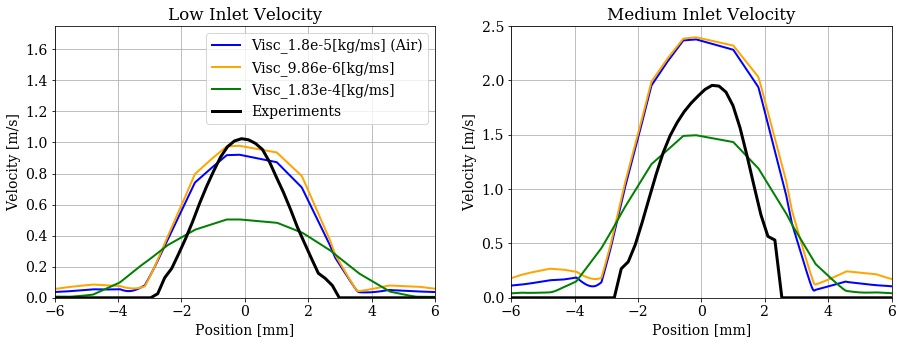

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Low Inlet Velocity')
plt.axis([-6,6,0,1.75])
plt.plot((df_viscosity_g1L[' Y [ m ]']-0.0125)*10**3,df_viscosity_g1L[' Velocity [ m s^-1 ]'],label='Visc_1.8e-5[kg/ms] (Air)',color='blue',linewidth='2')
plt.plot((df_viscosity_g2L[' Y [ m ]']-0.0125)*10**3,df_viscosity_g2L[' Velocity [ m s^-1 ]'],label='Visc_9.86e-6[kg/ms]',color='orange',linewidth='2')
plt.plot((df_viscosity_g3L[' Y [ m ]']-0.0125)*10**3,df_viscosity_g3L[' Velocity [ m s^-1 ]'],label='Visc_1.83e-4[kg/ms]',color='green',linewidth='2')
plt.plot(df_viscosity_s2L['x (mm)']-5.5,df_viscosity_s2L['V (m/s)'],label='Experiments',color='black',linewidth='3')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('Position [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Medium Inlet Velocity')
plt.axis([-6,6,0,2.5])
plt.plot((df_viscosity_g1M[' Y [ m ]']-0.0125)*10**3,df_viscosity_g1M[' Velocity [ m s^-1 ]'],label='Visc_1.8e-5[kg/ms] (Air)',color='blue',linewidth='2')
plt.plot((df_viscosity_g2M[' Y [ m ]']-0.0125)*10**3,df_viscosity_g2M[' Velocity [ m s^-1 ]'],label='Visc_9.86e-6[kg/ms]',color='orange',linewidth='2')
plt.plot((df_viscosity_g3M[' Y [ m ]']-0.0125)*10**3,df_viscosity_g3M[' Velocity [ m s^-1 ]'],label='Visc_1.83e-4[kg/ms]',color='green',linewidth='2')
plt.plot(df_viscosity_s2M['x (mm)']-5.5,df_viscosity_s2M['V (m/s)'],label='Experiments',color='black',linewidth='3')
plt.grid()

# Summary